In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, romberg, trapezoid, quad, fixed_quad
from scipy.special import roots_legendre
from scipy.optimize import newton

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: David Alejandro Pérez
*Métodos computacionales 2024-II*

---

#1
* Implemente una función para el **método de integración de Romberg** definiendo un límite de tolerancia de 1e-8 y/o un máximo de iteraciones de 10.

* Encuentre la integral para

$$\int_0^{\pi/4} dx\, e^{3x}\cdot \sin(x)$$

* Imprima su resultado y compare los valores dados por `scipy.integrate.romberg`

* Finalmente, encuentre el valor del error, hallando el valor exacto usando `sympy`



In [ ]:
#primero realizaremos una funcion que calcule el
def trapezoide(f, a, b, n):
  h = (b - a)/n
  s= 0

  for i in range(1, n):
    xi = a + i*h
    s += f(xi)

  return (f(a) + 2*(s) + f(b))*(h/2)


def romberg(f, a, b, tol = 1e-8, Nmax = 10):
  n = 10
  R = np.zeros((Nmax,Nmax))
  R[0,0] = trapezoide(f, a, b, n)

  for i in range(1, Nmax):
    n = n*2
    R[i,0] = trapezoide(f, a, b, n)
    for j in range(1, Nmax):
      if j <= i:
        s = j - 1
        R[i,j] = R[i, s] + ((R[i, s]- R[i - 1, s])/(4**(j) - 1))
        #print(abs(R[i, i] - R[i - 1, i - 1]), R[i,i])


    if abs(R[i, i] - R[i - 1, i - 1]) < tol:
      I_t = R[i, i]
      break


  for i in range(np.shape(R)[0]):
    text = ''
    for j in range(np.shape(R)[1]):
      if R[i,j] != 0:
        text += f"{R[i,j]:.10f}\t"
    print(text)

    if np.any([list(R[i]),list(np.zeros(np.shape(R)[1]))]) == False:
      break


  return I_t

f = lambda x: np.exp(3*x)*np.sin(x)

Ie = romberg(f, 0, np.pi/4, tol = 1e-8, Nmax = 10)


print(f"El valor de la integral mediante mi funcion de metodo de romberg es: {Ie}")



1.6069077219	
1.5958032029	1.5921016966	
1.5930242688	1.5920979574	1.5920977081	
1.5923293598	1.5920977235	1.5920977079	1.5920977079	

El valor de la integral mediante mi funcion de metodo de romberg es: 1.5920977078586798


In [ ]:
# con simpy:
x_1 = sp.Symbol('x')
f = sp.exp(3*x_1)*sp.sin(x_1)
Is = sp.integrate(f, (x_1, 0, np.pi/4))
Ir = sp.lambdify(x_1, Is, 'numpy')(1)

print(f"""El error que hay de la estimación por nuestra función
para el método de integracion de romberg es de {abs(Ir - Ie)}""")

El error que hay de la estimación por nuestra función
para el método de integracion de romberg es de 2.220446049250313e-16


In [ ]:
np.any([[0, 0, 0],[0, 0, 0]])

False

#2

* Usando los *métodos trapezoidal compuesto*, *simpson 1/3* y de *medio punto* encuentre la siguiente integral,

$$\int_e^{1+e} dx\, \frac{1}{x\ln x}$$

* Luego, haga un estudio de la convergencia en términos del valor de $h$ o de los sub-intervalos de la función. ¿Cuál es mejor?


In [ ]:
f = lambda x: 1/(x*np.log(x))

s = np.linspace(np.e, 1+np.e, 10)
I1 = trapezoide(f, np.e, 1+np.e, 100)
I2 = simpson(f(s), s)

print(I1, I2 )


0.2725153276271113 0.2725136148178895


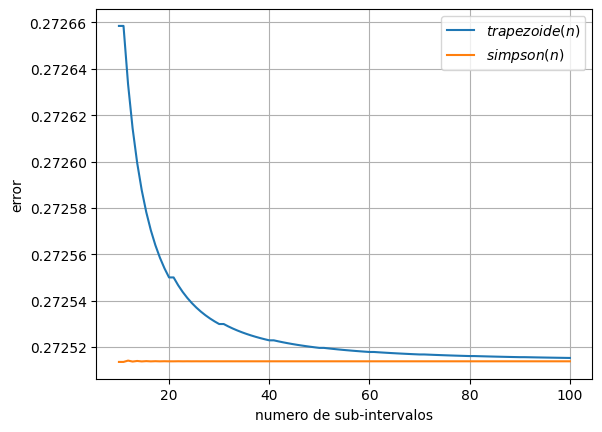

Analizando la gráfica podemos ver que el método trapezoidal
nos da una mejor aproximaxion para el primer valor, luego, el método
de simpson1/3 converge MUCHO mas rápido 


In [ ]:
n_lin = np.linspace(10, 100, 100)
I1_lin = np.zeros(len(n_lin))
I2_lin = np.zeros(len(n_lin))

for i in range(len(n_lin)):
  I1_lin[i] = trapezoide(f, np.e, 1+np.e, int(n_lin[i]))
  simp_lin = np.linspace(np.e, 1+np.e, int(n_lin[i]))
  I2_lin[i] = simpson(f(simp_lin), simp_lin)


#plt.plot(n_lin, np.abs(I1_lin - I2_lin), label = "$error$ = |I1(n) - I2(n)|")
plt.plot(n_lin, I1_lin, label = "$trapezoide(n)$")
plt.plot(n_lin, I2_lin, label = "$simpson(n)$")
plt.xlabel("numero de sub-intervalos")
plt.ylabel("error")
plt.legend()
plt.grid()
plt.show()

print(f"""Analizando la gráfica podemos ver que el método trapezoidal
nos da una mejor aproximaxion para el primer valor, luego, el método
de simpson1/3 converge MUCHO mas rápido """)

#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [ ]:
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral

def gauss_quad(func, a, b, n):

  m = (b-a)/2
  c = (a+b)/2

  return m*gauss_quad_standard(lambda x: func(m*x+c), n)

print(f"Solucion de la integral 2 con el método cuadratura de gauss generalizada: {gauss_quad(f, np.e, 1+np.e, 100)}")

Solucion de la integral 2 con el método cuadratura de gauss generalizada: 0.27251388050258346


#4

Encuentra todas las raices para los polinomios de grado 3 y 4 de **Legendre** usando el Método de la Secante y Newton-Raphson.



```python
import sympy as sp
x = sp.Symbol('x')

# Polinomio de Legendre de grado n
Pn = sp.legendre(n, x)

```

y calcule los pesos $w_i$ de la cuadratura mediante la fórmula:
   $$
   w_i = \frac{2}{(1 - x_i^2) \left[P_n'(x_i)\right]^2},
   $$
   donde $P_n'(x)$ es la derivada del polinomio de Legendre $P_n(x)$.


In [ ]:
x = sp.Symbol('x')

# Polinomio de Legendre de grado n
Pn_3 = sp.legendre(3, x)
Pn_4 = sp.legendre(4, x)

pn_3l = sp.lambdify(x, Pn_3, 'numpy')
pn_4l = sp.lambdify(x, Pn_4, 'numpy')

pn_3d = sp.diff(Pn_3, x, 1)
pn_4d = sp.diff(Pn_4, x, 1)

pn_3dl = sp.lambdify(x, pn_3d, 'numpy')
pn_4dl = sp.lambdify(x, pn_4d, 'numpy')


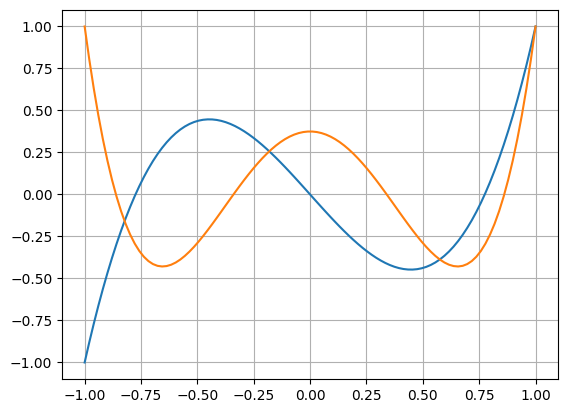

In [ ]:
x_lin = np.linspace(-1, 1, 100)

pn_3l_lin = pn_3l(x_lin)
pn_4l_lin = pn_4l(x_lin)

plt.plot(x_lin, pn_3l_lin)
plt.plot(x_lin, pn_4l_lin)
plt.grid()
plt.show()

In [ ]:
raices_sec3 = np.zeros(len(x_lin))
raices_sec4 = []

for i in range(len(x_lin)):
  if abs(pn_3l(x_lin[i])) < 0.01:
    raices_sec3[i] = newton(pn_3l, x0 = x_lin[i])
  elif abs(pn_4l(x_lin[i])) < 0.02:
    raices_sec4.append(newton(pn_4l, x0 = x_lin[i]))

raices_vs3 = np.unique(raices_sec3)
raices_vs4 = np.array(list(set(raices_sec4)))

x1s3, x2s3, x3s3 = raices_vs3[0], raices_vs3[1], raices_vs3[2]     # Raices para pn_3 por método de la secante
x1s4, x2s4, x3s4, x4s4 = raices_vs4[0], raices_vs4[1], raices_vs4[2], raices_vs4[3]     # Raices para pn_4 por el metodo de la secante

raices_n3 = np.zeros(len(x_lin))
raices_n4 = []

for i in range(len(x_lin)):
  if abs(pn_3l(x_lin[i])) < 0.01:
    raices_n3[i] = newton(pn_3l, x0 = x_lin[i], fprime = pn_3dl)
  if abs(pn_4l(x_lin[i])) < 0.02:
    raices_n4.append(newton(pn_4l, x0 = x_lin[i], fprime = pn_4dl))

raices_vn3 = np.unique(raices_n3)
raices_vn4 = np.array(list(set(raices_n4)))

x1n3, x2n3, x3n3 = raices_vn3[0], raices_vn3[1], raices_vn3[2]     # Raices para pn_3 por el metodo de newton
x1n4, x2n4, x3n4, x4n4 = raices_vn4[0], raices_vn4[1], raices_vn4[2], raices_vn4[3]     # Raices para pn_4 con el metyodo de newton





In [ ]:
# calculo de los pesos wi:
s = lambda f, x: 2/((1 - x**2)*((f(x))**2))
w1s3, w2s3, w2s3 = s(pn_3dl, x1s3), s(pn_3dl, x2s3), s(pn_3dl, x3s3)   # pesos para pn_3 con raices de secante
w1s4, w2s4, w3s4, w4s4 = s(pn_4dl, x1s4), s(pn_4dl, x2s4), s(pn_4dl, x3s4), s(pn_4dl, x4s4)  #pesos para pn_3 con raices de secante

w1n3, w2n3, w3n3 = s(pn_3dl, x1n3), s(pn_3dl, x2n3), s(pn_3dl, x3n3)    # pesos para pn_3 con raices de Newton
w1n4, w2n4, w3n4, w4n4 = s(pn_4dl, x1n4), s(pn_4dl, x2n4), s(pn_4dl, x3n4), s(pn_4dl, x4n4)   # Pesos para pn_4 con raices de newton